Importing required modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import cv2
import torchvision
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms
import torch.utils.data as data
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

creating a simple CNN network


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class CNN_2D(nn.Module):
    def __init__(self):
        super(CNN_2D, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(128, 264, 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))
        self.layer4 = nn.Sequential(
            nn.Linear(14 * 14 * 264, 1000, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.2))
        self.layer5 = nn.Sequential(
            nn.Linear(1000, 500),
            nn.ReLU(),
            nn.Dropout(p=0.2))
        self.layer6 = nn.Sequential(
            nn.Linear(500, 2))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        return out
        

Visualizing the network


In [ ]:
net = CNN_2D()
print(net)

CNN_2D(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 264, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=51744, out_features=1000, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (layer5): Sequential(
    (0): Linear(in_features=1000, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (layer6): Sequen

Defining function to load data

In [ ]:
def DATA_LOADER():
    train_folder = "/content/drive/My Drive/signatureverification/train"
    test_folder = "/content/drive/My Drive/signatureverification/test"
    BATCH_SIZE = 10
    Transforming = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation((30, 120)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.4, 0.5], std=[0.22, 0.24, 0.22])])
    train_data = torchvision.datasets.ImageFolder(root=train_folder, transform=Transforming)
    test_data = torchvision.datasets.ImageFolder(root=test_folder, transform=Transforming)
    train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
    test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
    return train_loader, test_loader



Visualizing Image


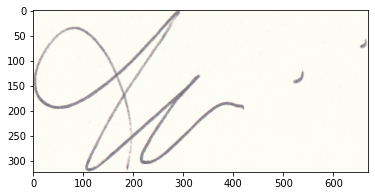

In [ ]:
path = "/content/drive/My Drive/signatureverification/test/original/01_049.png"
img = cv2.imread(path)
plt.imshow(img)

Training loop

In [ ]:
model = CNN_2D()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_loader, test_loader = DATA_LOADER()

for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss))
        running_loss = 0.0

print('Finished Training')
PATH = '/content/drive/My Drive/signatureverification/classifier.pth'
torch.save(CNN_2D().state_dict(), PATH)

[1,     1] loss: 0.701
[1,     2] loss: 19.605
[1,     3] loss: 0.996
[1,     4] loss: 0.737
[1,     5] loss: 0.745
[1,     6] loss: 0.603
[1,     7] loss: 0.692
[1,     8] loss: 0.519
[1,     9] loss: 0.989
[1,    10] loss: 0.408
[1,    11] loss: 0.543
[1,    12] loss: 0.715
[1,    13] loss: 0.600
[1,    14] loss: 0.543
[1,    15] loss: 0.429
[1,    16] loss: 0.361
[1,    17] loss: 1.136
[1,    18] loss: 0.774
[1,    19] loss: 0.441
[1,    20] loss: 0.562
[1,    21] loss: 0.616
[1,    22] loss: 0.598
[1,    23] loss: 0.555
[1,    24] loss: 0.538
[1,    25] loss: 0.615
[1,    26] loss: 0.369
[1,    27] loss: 0.559
[1,    28] loss: 0.925
[1,    29] loss: 0.475
[1,    30] loss: 1.007
[1,    31] loss: 0.724
[1,    32] loss: 0.732
[1,    33] loss: 0.653
[1,    34] loss: 0.583
[1,    35] loss: 0.677
[1,    36] loss: 0.619
[1,    37] loss: 0.660
[1,    38] loss: 0.689
[1,    39] loss: 0.718
[1,    40] loss: 0.584
[1,    41] loss: 0.658
[1,    42] loss: 0.605
[1,    43] loss: 0.616
[1,    44]

Testing 


In [ ]:
train_loader, test_loader = DATA_LOADER()
dataiter = iter(test_loader)
images, labels = dataiter.next()
model = CNN_2D()
model.load_state_dict(torch.load('/content/drive/My Drive/signatureverification/classifier.pth'))
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (100 * correct / total))

Accuracy of the network on test images: 50 %
